<a href="https://colab.research.google.com/github/Zaeniah1989/aplikasi-asuransi-linreg/blob/main/Latihanmodul15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip 
 

--2021-11-10 05:28:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 142.250.97.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   204MB/s    in 0.3s    

2021-11-10 05:28:34 (204 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close() 
 

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') 
 
train_dogs_dir = os.path.join(train_dir, 'dogs') 
 
validation_cats_dir = os.path.join(validation_dir, 'cats') 
 
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10]) 

['cat.427.jpg', 'cat.452.jpg', 'cat.338.jpg', 'cat.727.jpg', 'cat.111.jpg', 'cat.872.jpg', 'cat.583.jpg', 'cat.149.jpg', 'cat.907.jpg', 'cat.91.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [6]:
  %matplotlib inline

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg 
 
  nrows = 4
  ncols = 4 
 
  pic_index = 0 

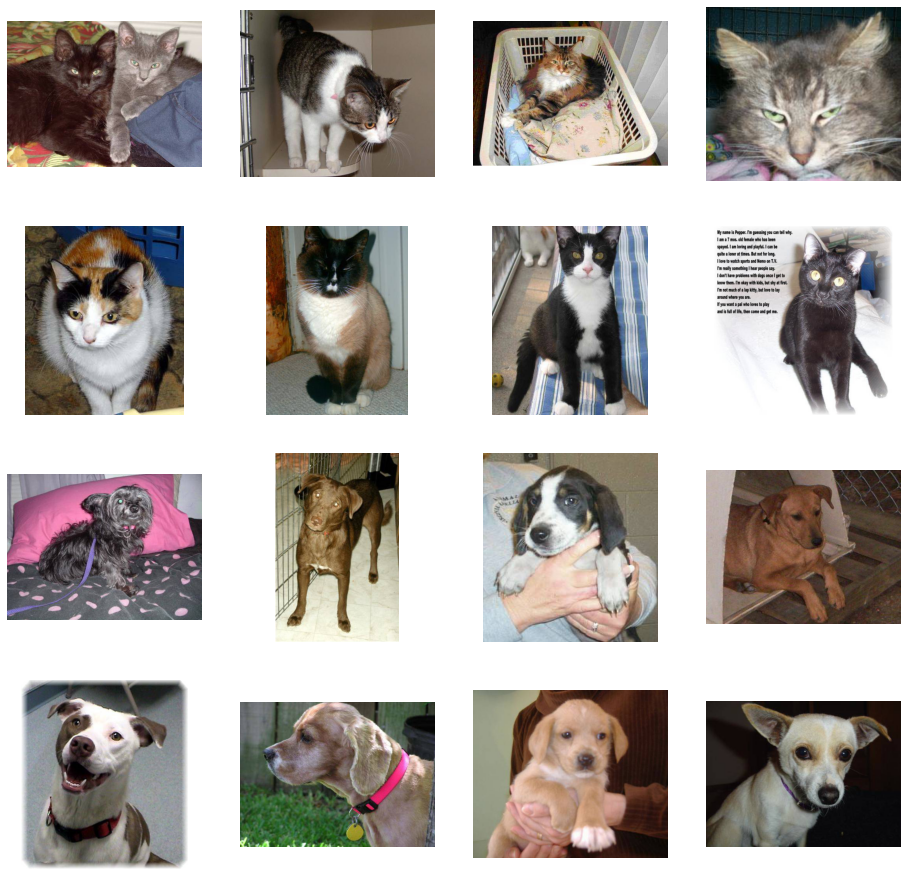

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]] 
 
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')  
 
  img = mpimg.imread(img_path)
  plt.imshow(img) 
 
plt.show()

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import Model 

In [9]:
img_input = layers.Input(shape=(150, 150, 3))
 
x = layers.Flatten()(img_input) 
 
x = layers.Dense(512, activation='relu')(x) 
 
output = layers.Dense(2, activation='sigmoid')(x) 
 
model = Model(img_input, output) 
 

In [10]:
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 34,561,538
Trainable params: 34,561,538
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc']) 
 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [12]:
from imutils import paths

imagePathV = paths.list_images('/tmp/cats_and_dogs_filtered/validation')
imagePathD = paths.list_images('/tmp/cats_and_dogs_filtered/train') 
 
data = []
labelsd = []
val = []
labelsv = [] 
 

In [13]:
from PIL import Image
import numpy as np

for imagePath in imagePathD: 
 
  a = Image.open(imagePath)
  image = np.array(a.resize((150,150))) / 255.0
  data.append(image) 
 
  label = imagePath.split(os.path.sep) [-2]
  labelsd.append(label) 
 

In [14]:
for imagePath in imagePathV:

  a = Image.open(imagePath)
  image = np.array(a.resize((150,150))) / 255.0
  val.append(image) 
 
  label = imagePath.split(os.path.sep) [-2]
  labelsv.append(label)


In [15]:
from sklearn.preprocessing import LabelBinarizer

print(labelsv)
lb = LabelBinarizer()
labelsv1 = lb.fit_transform(labelsv) 
e = 55
b = 32

#H=model.fit(trainX, trainY,validation_data=(testX, testY), batch_size=b, epochs=e, shuffle=True )
#predY=model.predict(testX)
#print("\n Evaluate the new model against the test set:")
#model.evaluate(x=testX, y=testY, batch_size=32)
#list_of_metrics_to_plot = ['accuracy'] 
 
labelsv = np.hstack((labelsv1, 1 - labelsv1))
labelsv 
 
 
print(labelsd)
lb = LabelBinarizer()
labelsd1 = lb.fit_transform(labelsd)
labelsd = np.hstack((labelsd1, 1 - labelsd1))
labelsd

['dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs',

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [16]:
from sklearn.model_selection import train_test_split

(trainX,testX, trainY, testY) = train_test_split(np.array(data),
np.array(labelsd), test_size=0.2)
print(trainX.shape)
print(testX.shape) 

(1600, 150, 150, 3)
(400, 150, 150, 3)


In [17]:
e = 55
b = 32

H=model.fit(trainX, trainY,validation_data=(testX, testY), batch_size=b, epochs=e, shuffle=True )
predY=model.predict(testX)
print("\n Mengevaluasi Model yang telah ditraining dengan menggunakan data uji:")
model.evaluate(x=testX, y=testY, batch_size=32) 
list_of_metrics_to_plot = ['accuracy'] 
 

Epoch 1/55
50/50 [==============================] - 17s 321ms/step - loss: 30.0499 - acc: 0.4856 - val_loss: 15.6089 - val_acc: 0.4750
Epoch 2/55
50/50 [==============================] - 16s 311ms/step - loss: 11.9813 - acc: 0.5019 - val_loss: 9.0252 - val_acc: 0.4750
Epoch 3/55
50/50 [==============================] - 16s 311ms/step - loss: 9.0480 - acc: 0.5500 - val_loss: 7.5715 - val_acc: 0.5825
Epoch 4/55
50/50 [==============================] - 16s 312ms/step - loss: 7.0150 - acc: 0.5281 - val_loss: 4.3276 - val_acc: 0.5200
Epoch 5/55
50/50 [==============================] - 16s 311ms/step - loss: 3.5601 - acc: 0.5169 - val_loss: 3.1817 - val_acc: 0.5250
Epoch 6/55
50/50 [==============================] - 16s 315ms/step - loss: 2.3059 - acc: 0.5219 - val_loss: 2.2852 - val_acc: 0.5275
Epoch 7/55
50/50 [==============================] - 16s 312ms/step - loss: 1.8642 - acc: 0.5244 - val_loss: 0.9837 - val_acc: 0.5175
Epoch 8/55
50/50 [==============================] - 15s 310ms/step

Text(0, 0.5, 'Loss')

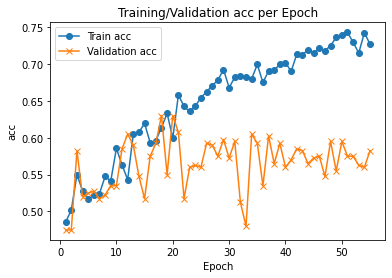

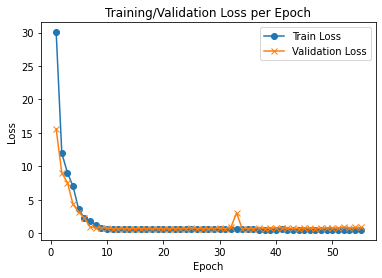

In [18]:
#grafik perbandingan val_acc dengan train_acc
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + H.history['acc'], 'o-')
ax.plot([None] + H.history['val_acc'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc') 

#grafik perbandingan loss train dengan loss val
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + H.history['loss'], 'o-')
ax.plot([None] + H.history['val_loss'], 'x-')

ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 

In [19]:
from sklearn.metrics import multilabel_confusion_matrix 
 
predY[1]
rounded_labels=np.argmax(predY, axis=1)
rounded_labels[1]
rounded_predict=np.argmax(testY, axis=1)
rounded_predict[1]

0

In [20]:
pip install confusion_matrix

     |████████████████████████████████| 154 kB 4.9 MB/s 
  Created wheel for confusion-matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2423 sha256=a5f10d694a2f8f7c9df3404bb4458598afec79c51b3195781e4d1e54e8035313
  Stored in directory: /root/.cache/pip/wheels/33/29/10/f96f371d17f57f7106d4dab90b904465fcf670312026eac626
Successfully built confusion-matrix


In [21]:
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.metrics import confusion_matrix
from sklearn import metrics

predY[1]
rounded_labels=np.argmax(predY, axis=1)
rounded_labels[1]
rounded_predict=np.argmax(testY, axis=1)
rounded_predict[1]

cm = confusion_matrix(rounded_labels, rounded_predict)
#plot_confusion_matrix(cm)

 

In [22]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN = cm[0,0]

# Sensitivity, hit rate, recall, atau true positive rateTPR = TP/(TP+FN) #Recall
# Specificity atau true negative rate
TNR = TN/(TN+FP) 
# Precision atau positive predictive value
PPV = TP/(TP+FP) #Precision
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out atau false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP) 
 
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
F1 = 2*((PPV*FPR)/(PPV+FPR))
print("Positi = Kucing, Negatif =  Anjing")
print(PPV)


Positi = Kucing, Negatif =  Anjing
0.3631578947368421


In [23]:
from sklearn.metrics import classification_report

print("[INFO] Mengevaluasi model...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),
target_names=lb.classes_))

[INFO] Mengevaluasi model...
              precision    recall  f1-score   support

        cats       0.58      0.78      0.66       210
        dogs       0.60      0.36      0.45       190

    accuracy                           0.58       400
   macro avg       0.59      0.57      0.56       400
weighted avg       0.59      0.58      0.56       400

